## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
# 超參數設定
LEARNING_RATE = [1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.5, 0.75, 0.95]
NESTEROV = [True, False]

In [7]:
results = {}

import itertools
for lr, momentum, nesterov in itertools.product(LEARNING_RATE, MOMENTUM, NESTEROV):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.3f, Momentum = %.2f, Nesterov = %s" % (lr, momentum, str(nesterov)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=nesterov, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s-nesterov-%s" % (str(lr), str(momentum), str(nesterov))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.001, Momentum = 0.50, Nesterov = True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
___________________________

Epoch 1/50



196/196 [==============================] - 3s 12ms/step - loss: 1.9953 - accuracy: 0.2893 - val_loss: 1.8548 - val_accuracy: 0.3412
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8156 - accuracy: 0.3571 - val_loss: 1.7554 - val_accuracy: 0.3751
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7359 - accuracy: 0.3877 - val_loss: 1.7798 - val_accuracy: 0.3515
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6847 - accuracy: 0.4068 - val_loss: 1.7184 - val_accuracy: 0.3947
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6444 - accuracy: 0.4200 - val_loss: 1.7237 - val_accuracy: 0.4010
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6070 - accuracy: 0.4337 - val_loss: 1.6307 - val_accuracy: 0.4227
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5744 - accuracy: 0.4456 - val_loss: 1.5892 - val_accuracy: 0.4386
Epoch 8/50

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 1.9819 - accuracy: 0.2950 - val_loss: 1.8711 - val_accuracy: 0.3312
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.8051 - accuracy: 0.3639 - val_loss: 1.7876 - val_accuracy: 0.3738
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 1.7310 - accuracy: 0.3896 - val_loss: 1.7697 - val_accuracy: 0.3805
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.6733 - accuracy: 0.4119 - val_loss: 1.6776 - val_accuracy: 0.4072
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.6329 - accuracy: 0.4240 - val_loss: 1.6831 - val_accuracy: 0.3946
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5963 - accuracy: 0.4382 - val_loss: 1.6151 - val_accuracy: 0.4213
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5701 - accuracy: 0.4471 - val_loss: 1.6653 - val_accuracy: 0.4132
Epoch 

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9314 - accuracy: 0.3061 - val_loss: 1.8107 - val_accuracy: 0.3583
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7367 - accuracy: 0.3837 - val_loss: 1.7052 - val_accuracy: 0.3968
Epoch 3/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6566 - accuracy: 0.4154 - val_loss: 1.6412 - val_accuracy: 0.4254
Epoch 4/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5976 - accuracy: 0.4353 - val_loss: 1.6691 - val_accuracy: 0.4023
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5537 - accuracy: 0.4519 - val_loss: 1.5773 - val_accuracy: 0.4391
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5171 - accuracy: 0.4654 - val_loss: 1.5817 - val_accuracy: 0.4355
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4796 - accuracy: 0.4767 - val_loss: 1.4806 - val_accuracy: 0.4735
E

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 1.9383 - accuracy: 0.3097 - val_loss: 1.8515 - val_accuracy: 0.3314
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.7403 - accuracy: 0.3827 - val_loss: 1.6923 - val_accuracy: 0.3998
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 1.6568 - accuracy: 0.4126 - val_loss: 1.6992 - val_accuracy: 0.4000
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6009 - accuracy: 0.4349 - val_loss: 1.5938 - val_accuracy: 0.4341
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5607 - accuracy: 0.4489 - val_loss: 1.5284 - val_accuracy: 0.4586
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5186 - accuracy: 0.4618 - val_loss: 1.5438 - val_accuracy: 0.4595
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4851 - accuracy: 0.4746 - val_loss: 1.5264 - val_accuracy: 0.4652
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 11ms/step - loss: 1.8283 - accuracy: 0.3435 - val_loss: 1.8113 - val_accuracy: 0.3481
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6047 - accuracy: 0.4306 - val_loss: 1.5606 - val_accuracy: 0.4409
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5076 - accuracy: 0.4643 - val_loss: 1.4864 - val_accuracy: 0.4671
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4521 - accuracy: 0.4823 - val_loss: 1.4869 - val_accuracy: 0.4714
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4040 - accuracy: 0.5018 - val_loss: 1.5053 - val_accuracy: 0.4703
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3617 - accuracy: 0.5167 - val_loss: 1.4868 - val_accuracy: 0.4664
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3291 - accuracy: 0.5264 - val_loss: 1.3846 - val_accuracy: 0.5062

Epoch 1/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9103 - accuracy: 0.3064 - val_loss: 1.7482 - val_accuracy: 0.3684
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6793 - accuracy: 0.3973 - val_loss: 1.6318 - val_accuracy: 0.4128
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 1.6086 - accuracy: 0.4253 - val_loss: 1.5452 - val_accuracy: 0.4518
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5326 - accuracy: 0.4561 - val_loss: 1.4944 - val_accuracy: 0.4710
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4810 - accuracy: 0.4696 - val_loss: 1.4765 - val_accuracy: 0.4727
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4648 - accuracy: 0.4770 - val_loss: 1.4466 - val_accuracy: 0.4799
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4253 - accuracy: 0.4909 - val_loss: 1.4703 - val_accuracy: 0.4713
Epoch

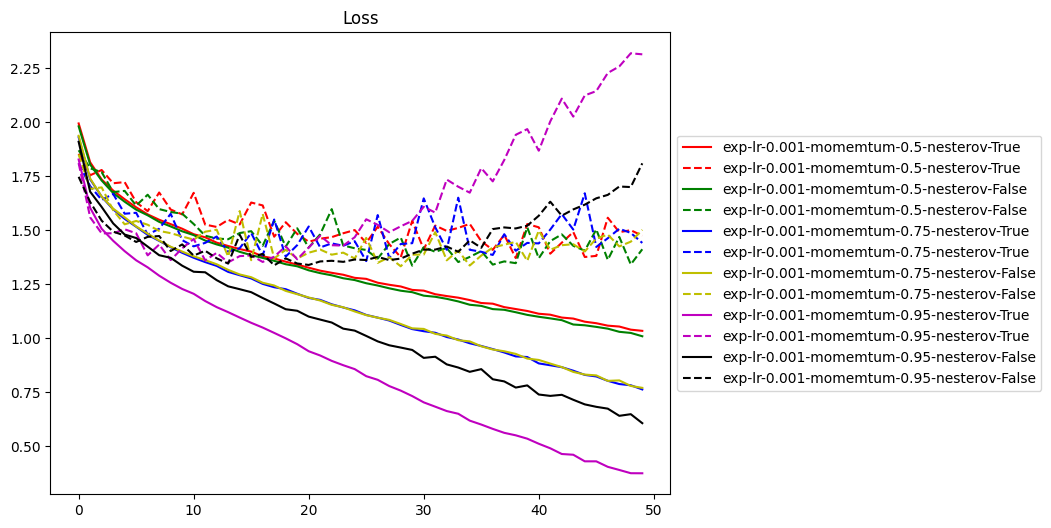

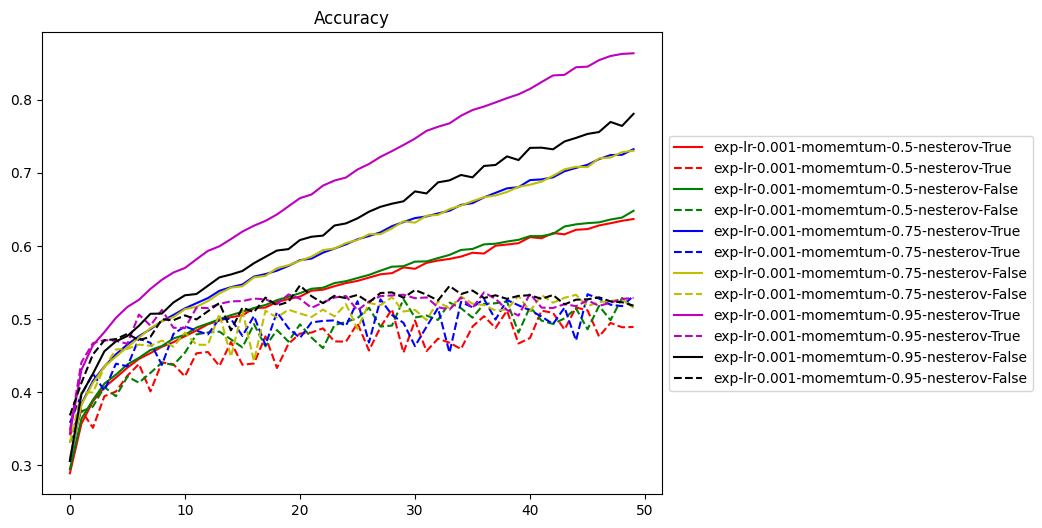

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

筆記
* Momemtum 越高, 會有overfitting 現象
* Nesterov 是否有使用, 效果差異不大